In [ ]:
import numpy as np
import pandas as pd

In [3]:
df_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'

df = pd.read_csv(df_url, header=None)

df.sample(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
492,0.11132,0.0,27.74,0,0.609,5.983,83.5,2.1099,4,711.0,20.1,396.90,13.35,20.1
369,5.66998,0.0,18.10,1,0.631,6.683,96.8,1.3567,24,666.0,20.2,375.33,3.73,50.0
154,1.41385,0.0,19.58,1,0.871,6.129,96.0,1.7494,5,403.0,14.7,321.02,15.12,17.0
270,0.29916,20.0,6.96,0,0.464,5.856,42.1,4.4290,3,223.0,18.6,388.65,13.00,21.1
19,0.72580,0.0,8.14,0,0.538,5.727,69.5,3.7965,4,307.0,21.0,390.95,11.28,18.2


In [10]:
X = df.values[0:35, 12]
y = df.values[0:35, 13]

<Axes: >

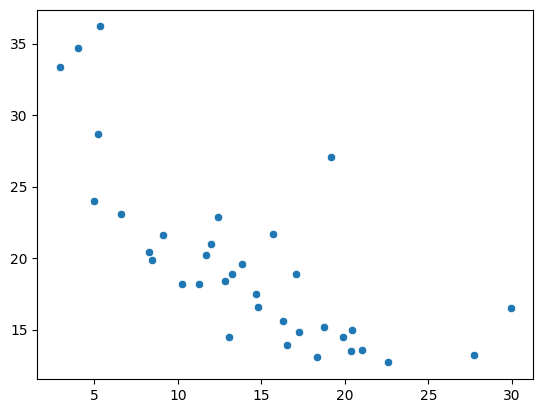

In [11]:
import seaborn as sns

sns.scatterplot(x=X, y=y)

### Simple Linear Regression

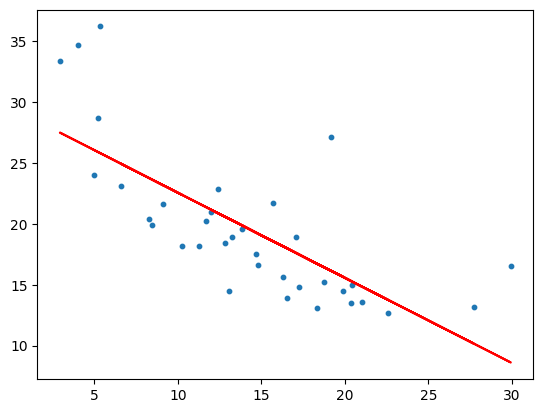

RMSE: 4.109901007971022
R2 score: 0.5397260819538162


In [16]:
# Simple Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

lg = LinearRegression()

X_re = X[:, np.newaxis]
y_re = y[:, np.newaxis]

lg.fit(X_re, y_re)

y_pred = lg.predict(X_re)
plt.scatter(X_re, y_re, s=10)
plt.plot(X_re, y_pred, color='r')
plt.show()

# Model Accuracy
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)
print("RMSE: " + str(rmse))
print("R2 score: " + str(r2))


### Polynomial Regression

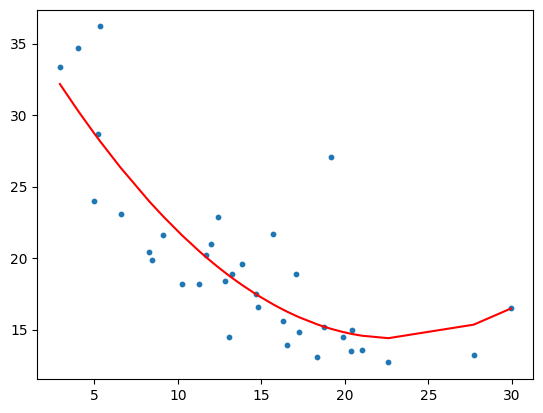

RMSE: 3.7775471605955615
R2 score: 0.6111577631639984


In [24]:
import operator
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt

lg = LinearRegression()

X_re = X[:, np.newaxis]
y_re = y[:, np.newaxis]

polynomial_features = PolynomialFeatures(degree=2)
X_poly = polynomial_features.fit_transform(X_re)

lg.fit(X_poly, y_re)

y_poly_pred = lg.predict(X_poly)

# Plot fit over data:
plt.scatter(X_re, y_re, s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_re, y_poly_pred), key=sort_axis)
X_re_sort, y_poly_pred = zip(*sorted_zip)
plt.plot(X_re_sort, y_poly_pred, color='r')
plt.show()

# Model accuracy
rmse = np.sqrt(mean_squared_error(y_re, y_poly_pred))
r2 = r2_score(y_re, y_poly_pred)
print("RMSE: " + str(rmse))
print("R2 score: " + str(r2))

### Ridge Regression

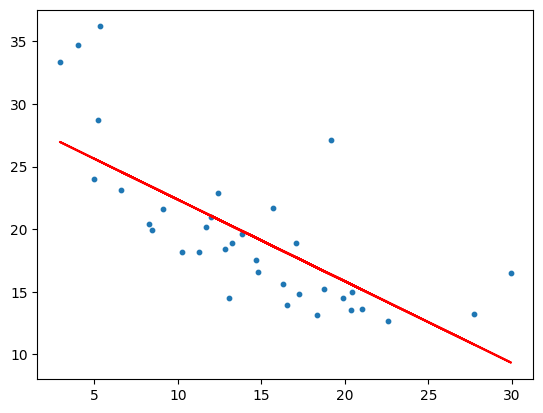

RMSE: 4.120346020033415
R2 score: 0.5373836042855222


In [31]:
# Model with ridge regularization
from sklearn.linear_model import Ridge

# define model with alpha=1
ridge_reg = Ridge(alpha=100)

# reshape
X_re = X[:, np.newaxis]
y_re = y[:, np.newaxis]

# fit ridge model
ridge_reg.fit(X_re, y_re)

# predict y
y_ridge_pred = ridge_reg.predict(X_re)

# Plot fit over data
plt.scatter(X_re, y_re, s=10)
plt.plot(X_re, y_ridge_pred, color='r')
plt.show()

# Model accuracy
rmse = np.sqrt(mean_squared_error(y_re, y_ridge_pred))
r2 = r2_score(y_re, y_ridge_pred)
print("RMSE: " + str(rmse))
print("R2 score: " + str(r2))